In [1]:
# needed imports
import numpy as np
import matplotlib.pyplot as plt
from bmd import *
from bmd_biv import *
import scipy.io as sio
from numba import jit

In [2]:
# returns n samples (input 'n') from vector ('vec') with corresponding probabilities ('ps')
@jit(nopython=True)
def rand_choice_nb(vec, n, ps):   
    res = np.zeros(n) # initializes results
    for i in range(n): # loops over samples
        res[i] = vec[np.searchsorted(np.cumsum(ps), np.random.random(), side="right")] # assigns selection to results vector
    return res # returns results vector

In [3]:
# f1 is 1022-pt distribution
# pts is array of number of points tested
# N is Monte Carlo (run) number

# returns a 5-by-len(pts)-by-N array of values

# first dimension is method [MBC-IA Uniform Prior, MBC-IA Jeffreys Prior, clt, MBC-BC Uniform Prior, MBC-BC Jeffreys Prior]
# second dimension is number of sample points used
# third dimension are along number distributions drawn (runs)
def EMAM_data_gen_MBC(f, pts, N):
    
    data = np.zeros((5,len(pts),N)) # initializes data array
    x = np.linspace(0,1,1022) # x-values of distribution
    tm = int(np.round(np.sum(np.array([j*f[j] for j in range(len(f))])))) # index at distribution mean
    
    for k in range(len(pts)): # loops over points sampled (ns)
        for i in range(N): # loops over runs
            s = rand_choice_nb(x, int(pts[k]), f) # sample drawn from f
            
            md_ind_up = mdist_up(s, 10)[1] # mean posterior using MBC-IA with Uniform Prior
            data[0][k][i] = md_ind_up[tm] # assigns posterior value at true mean to data array
            
            md_ind_jp = mdist_jp(s, 10)[1] # mean posterior using MBC-IA with Jeffreys Prior
            data[1][k][i] = md_ind_jp[tm] # assigns posterior value at true mean to data array
            
            md_cl = mdist_cl(s, 10)[1] # mean posterior using CLT method
            data[2][k][i] = md_cl[tm] # assigns posterior value at true mean to data array
            
            md_biv_up = mdist_biv_up(s, 10)[1] # mean posterior using MBC-BC with Uniform Prior
            data[3][k][i] = md_biv_up[tm] # assigns posterior value at true mean to data array
            
            md_biv_jp = mdist_biv_jp(s, 10)[1] # mean posterior using MBC-IA with Jeffreys Prior
            data[4][k][i] = md_biv_jp[tm] # assigns posterior value at true mean to data array
        
    return data # returns data array

In [4]:
# f1 is 1022-pt distribution
# pts is array of number of points tested
# N is Monte Carlo (run) number

# returns a 2-by-len(pts)-by-N array of values

# first dimension is method [clt, st]
# second dimension is number of sample points used
# third dimension are along number distributions drawn (runs)
def EMAM_data_gen_cltst(f, pts, N):
    
    data = np.zeros((2,len(pts),N)) # initializes data array
    x = np.linspace(0,1,1022) # x-values of distribution
    tm = int(np.round(np.sum(np.array([j*f[j] for j in range(len(f))])))) # index at distribution mean
    
    for k in range(len(pts)): # loops over points sampled (ns)
        for i in range(N): # loops over runs
            s = rand_choice_nb(x, int(pts[k]), f) # sample drawn from f
            
            # assigns to data output the mean posterior using the CLT method at the true mean
            data[0][k][i] = norm.pdf(x[tm], np.mean(s), np.std(s)/np.sqrt(len(s)))
            # assigns to data output the mean posterior using the ST method at the true mean
            data[1][k][i] = t.pdf(x[tm], len(s)-1, np.mean(s), np.std(s)/np.sqrt(len(s)))
        
    return data

In [5]:
# vector of sample sizes (N)
ns = np.array(range(4,30+1))

Uniform Density

f1 mean: 0.5
f1 var: 0.0835


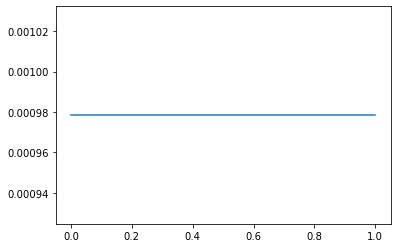

In [6]:
# plots and displays mean and variance of uniform density
# f1: uniform density
x = np.linspace(0,1,1022)
f1 = np.ones(1022)
f1 = f1/sum(f1)
plt.plot(x,f1)
mean = np.round(sum([x[i]*f1[i] for i in range(1022)]),5)
print('f1 mean:', mean)
print('f1 var:', np.round(sum([(x[i]-mean)**2*f1[i] for i in range(1022)]),5))

In [ ]:
data_f1_MBC = EMAM_data_gen_MBC(f1, ns, 100000) # calculates MBC methods results
sio.savemat('Data/full_uniform_100k_MBC.mat', {'full_uniform_100k_MBC':data_f1_MBC}) # writes MBC results to file
data_f1_cltst = EMAM_data_gen_cltst(f1, ns, 1000000) # calculates CLT and ST methods results
sio.savemat('Data/full_uniform_1M_cltst.mat', {'full_uniform_1M_cltst':data_f1_cltst}) # writes CLT and ST results to file

Centered Density

f2 mean: 0.5
f2 var: 0.0239


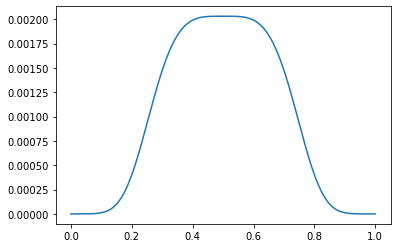

In [7]:
# plots and displays mean and variance of centered density
# f2: centered density
x = np.linspace(0,1,1022)
f2 = [np.exp(-200*(i-0.5)**4) for i in x]
f2 = f2/sum(f2)
plt.plot(x,f2)
mean = np.round(sum([x[i]*f2[i] for i in range(1022)]),5)
print('f2 mean:', mean)
print('f2 var:', np.round(sum([(x[i]-mean)**2*f2[i] for i in range(1022)]),5))

In [ ]:
data_f2_MBC = EMAM_data_gen_MBC(f2, ns, 100000) # calculates MBC methods results
sio.savemat('Data/full_center_100k_MBC.mat', {'full_center_100k_MBC':data_f2_MBC}) # writes MBC results to file
data_f2_cltst = EMAM_data_gen_cltst(f2, ns, 1000000) # calculates CLT and ST methods results
sio.savemat('Data/full_center_1M_cltst.mat', {'full_center_1M_cltst':data_f2_cltst}) # writes CLT and ST results to file

Decay Density

f3 mean: 0.16458
f3 var: 0.0239


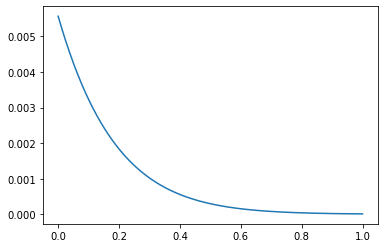

In [8]:
# plots and displays mean and variance of decay density
# f3: decay density
x = np.linspace(0,1,1022)
f3 = [np.exp(-0.0026115*(i-0.5+8.5)**4) for i in x]
f3 = f3/sum(f3)
plt.plot(x,f3)
mean = np.round(sum([x[i]*f3[i] for i in range(1022)]),5)
print('f3 mean:', mean)
print('f3 var:', np.round(sum([(x[i]-mean)**2*f3[i] for i in range(1022)]),5))

In [ ]:
data_f3_MBC = EMAM_data_gen_MBC(f3, ns, 100000) # calculates MBC methods results
sio.savemat('Data/full_decay_100k_MBC.mat', {'full_decay_100k_MBC':data_f3_MBC}) # writes MBC results to file
data_f3_cltst = EMAM_data_gen_cltst(f3, ns, 1000000) # calculates CLT and ST methods results
sio.savemat('Data/full_decay_1M_cltst.mat', {'full_decay_1M_cltst':data_f3_cltst}) # writes CLT and ST results to file

Whacky Density

f4 mean: 0.53429
f4 var: 0.06241


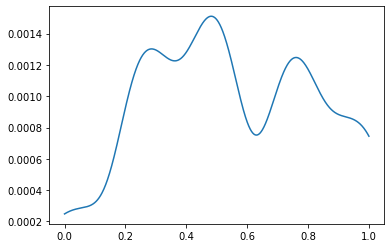

In [9]:
# plots and displays mean and variance of whacky density
# f4: whacky density
x = np.linspace(0,1,1022)
f4 = [np.exp(-(5*(i-1/8))**4)+4*np.exp(-(5*(i-3/8))**4)+2*np.exp(-(5*(i-5/8))**4)+3*np.exp(-(5*(i-7/8))**4) for i in x] # Let's stick with this one!
f4 = f4/sum(f4)
plt.plot(x,f4)
mean = np.round(sum([x[i]*f4[i] for i in range(1022)]),5)
print('f4 mean:', mean)
print('f4 var:', np.round(sum([(x[i]-mean)**2*f4[i] for i in range(1022)]),5))

In [ ]:
data_f4_MBC = EMAM_data_gen_MBC(f4, ns, 100000) # calculates MBC methods results
sio.savemat('Data/full_whacky_100k_MBC.mat', {'full_whacky_100k_MBC':data_f4_MBC}) # writes MBC results to file
data_f4_cltst = EMAM_data_gen_cltst(f4, ns, 1000000) # calculates CLT and ST methods results
sio.savemat('Data/full_whacky_1M_cltst.mat', {'full_whacky_1M_cltst':data_f4_cltst}) # writes CLT and ST results to file